# 图像平滑

## 目标

* 模糊/平滑图片来消除噪声
* 函数 ： cv2.blur(),cv2.GuaussianBlur(),cv2.medianBlur(),cv2.bilateralFilter()

## 正文
### 滤波与模糊
* 滤波和模糊
   * 他们都是卷积操作，不同滤波方法只是卷积核不同。（对线性滤波而言）
   * 低通滤波是模糊，高通滤波是锐化。
   
低通滤波器就是允许低频信号通过，在图像中边缘和噪点都相当于高频部分，所以低通滤波器用于去除噪点、平滑和模糊图像。高通滤波器则反之，用来增强图像边缘，进行锐化处理。图像的高频与低频是指图像变化的剧烈程度。在边缘处一般像素变化剧烈，为高频部分。

常见噪声有椒盐噪声和高斯噪声，椒盐噪声可以理解为斑点，随机出现在图像中的黑点或白点；高斯噪声可以理解为拍摄图片时由于光照等原因造成的噪声。

### 均值滤波

它取得是卷积核内得均值，使用cv2.blur()实现，如$3 \times 3$得卷积核：

$$
kernel=\frac{1}{9}
\left [
\begin{matrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{matrix}
\right ]
$$

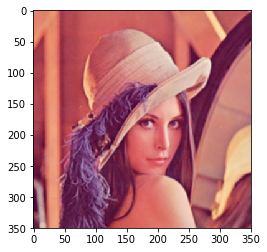

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img=cv2.imread('lena.jpg')
blur=cv2.blur(img,(3,3))  #均值模糊

plt.imshow(blur[:,:,::-1])

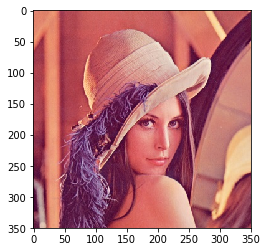

In [2]:
plt.imshow(img[:,:,::-1])

所有的滤波函数都有一个可选参数borderType，这个参数就是番外篇：卷积基础(图片边框)中所说的边框填充方式。

### 方框滤波
和均值滤波很像，如$3 \times 3$的核：

$$
kernel=a
\left [
\begin{matrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{matrix}
\right ]
$$

用cv2.boxFilter()函数实现，当可选参数normalize为True的时候，方框滤波就是均值滤波，上式中的a就等于1/9；normalize为False的时候，a=1，相当于求区域内的像素和。

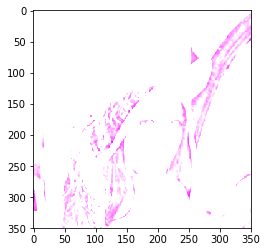

In [3]:
blur=cv2.boxFilter(img,-1,(3,3),normalize=False)
plt.imshow(blur[:,:,::-1])

In [4]:
cv2.boxFilter??

```
boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]]) -> dst
.   @param src input image.
.   @param dst output image of the same size and type as src.
.   @param ddepth the output image depth (-1 to use src.depth()).
.   @param ksize blurring kernel size.
.   @param anchor anchor point; default value Point(-1,-1) means that the anchor is at the kernel
.   center.
.   @param normalize flag, specifying whether the kernel is normalized by its area or not.
.   @param borderType border mode used to extrapolate pixels outside of the image, see #BorderTypes
.   @sa  blur, bilateralFilter, GaussianBlur, medianBlur, integral
```

### 高斯滤波
前面两种滤波方式，卷积核内的每个值都一样，也就是说图像区域中每个像素的权重也就一样。高斯滤波的卷积核权重并不相同：中间像素点权重最高，越远离中心的像素权重越小，来，数学时间( ╯□╰ )，还记得标准正态分布的曲线吗？


![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547705190229_cb3U1hbw0u.jpg)

显然这种处理元素间权值的方式更加合理一些。图像是2维的，所以我们需要使用2维的高斯函数，比如OpenCV中默认的3×3的高斯卷积核

函数 cv2.GaussianBlur(src,ksize,sigmaX)   

sigmaX为方差，σx值越大，模糊效果越明显。高斯滤波相比均值滤波效率要慢，但可以有效消除高斯噪声，能保留更多的图像细节，所以经常被称为最有用的滤波器

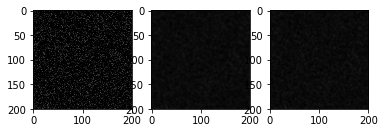

In [7]:
img=cv2.imread('gaussian_noise.bmp')

blur=cv2.blur(img,(5,5))
g_blur=cv2.GaussianBlur(img,(5,5),2)

plt.subplot(131)
plt.imshow(img[:,:,::-1])
plt.subplot(132)
plt.imshow(blur[:,:,::-1])
plt.subplot(133)
plt.imshow(g_blur[:,:,::-1])
plt.show()

### 中值滤波

中值又叫中位数，是所有数排序后取中间的值。中值滤波就是用区域内的中值来代替本像素值，所以那种孤立的斑点，如0或255很容易消除掉，适用于去除椒盐噪声和斑点噪声。中值是一种非线性操作，效率相比前面几种线性滤波要慢。

比如下面这张斑点噪声图，用中值滤波显然更好：

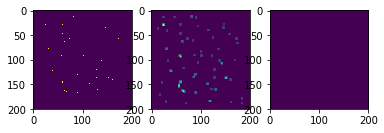

In [9]:
img = cv2.imread('salt_noise.bmp', 0)

# 均值滤波vs中值滤波
blur = cv2.blur(img, (5, 5))  # 均值滤波
median = cv2.medianBlur(img, 5)  # 中值滤波
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(blur)
plt.subplot(133)
plt.imshow(median)
plt.show()

In [10]:
cv2.medianBlur??

```
medianBlur(src, ksize[, dst]) -> dst
.   @note The median filter uses #BORDER_REPLICATE internally to cope with border pixels, see #BorderTypes
.   
.   @param src input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be
.   CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
.   @param dst destination array of the same size and type as src.
.   @param ksize aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...
.   @sa  bilateralFilter, blur, boxFilter, GaussianBlur
```

### 双边滤波
模糊操作基本都会损失掉图像细节信息，尤其前面介绍的线性滤波器，图像的边缘信息很难保留下来。然而，边缘（edge）信息是图像中很重要的一个特征，所以这才有了双边滤波。用cv2.bilateralFilter()函数实现：

```
bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
.   This filter does not work inplace.
.   @param src Source 8-bit or floating-point, 1-channel or 3-channel image.
.   @param dst Destination image of the same size and type as src .
.   @param d Diameter of each pixel neighborhood that is used during filtering. If it is non-positive,
.   it is computed from sigmaSpace.
.   @param sigmaColor Filter sigma in the color space. A larger value of the parameter means that
.   farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting
.   in larger areas of semi-equal color.
.   @param sigmaSpace Filter sigma in the coordinate space. A larger value of the parameter means that
.   farther pixels will influence each other as long as their colors are close enough (see sigmaColor
.   ). When d\>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is
.   proportional to sigmaSpace.
.   @param borderType border mode used to extrapolate pixels outside of the image, see #BorderTypes
```

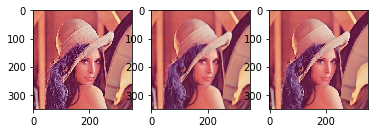

In [17]:
img = cv2.imread('lena.jpg')

# 双边滤波vs高斯滤波
gau = cv2.GaussianBlur(img, (5, 5), 0)  # 高斯滤波
blur = cv2.bilateralFilter(img, 9, 75, 75)  # 双边滤波
plt.subplot(131)
plt.imshow(img[:,:,::-1])
plt.subplot(132)
plt.imshow(gau[:,:,::-1])
plt.subplot(133)
plt.imshow(blur[:,:,::-1])
plt.show()

可以看到，双边滤波明显保留了更多边缘信息。

# 番外 - 高斯滤波卷积核


一维高斯分布$X \sim N(\mu,\sigma^2)$：
$$G(x)=\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

标准正太分布:$X \sim N(0,1)$：
    $$G(x)=\frac{1}{\sqrt{2\pi}}exp(-\frac{x^2}{2})$$

二维X,Y相互独立的高斯函数
$$G(x,y)=\frac{1}{2\pi\sigma_x \sigma_y}exp\left( -\frac{(x-\mu_x)^2+(y-\mu_y)^2}{2\sigma_x\sigma_y}\right)=G(x)G(y)$$

由上可知，二维高斯函数具有可分离性，所以OpenCV分两步计算二维高斯卷积，先水平再垂直，每个方向上都是一维的卷积。OpenCV中这个一维卷积的计算公式类似于上面的一维高斯函数：
$$G(i)= α ∗ exp(− \frac {(i − \frac{ksize−1}{2})^2}{2σ^2})$$

其中 $i=0,1,...,ksize-1$,$\alpha$是常数，也称缩放因子，它使$\sum G(i)=1$

我们可以使用cv2.getGaussianKernel（ksize,sigma）来生成高斯核

* sigma<0时，sigma=0.3(0.5(ksize-1)-1)+0.8
* sigma>0时，sigma=sigma.

In [19]:
print(cv2.getGaussianKernel(3,0))

[[0.25]
 [0.5 ]
 [0.25]]


生成之后，先进行三次的水平卷积：
$$I×
\begin{bmatrix} 0.25 & 0.5 & 0.25 \\ 0.25 & 0.5 & 0.25 \\ 0.25 & 0.5 & 0.25 \\ \end{bmatrix}
$$
然后再进行垂直的三次卷积：
$$I×
\begin{bmatrix} 0.25 & 0.5 & 0.25 \\ 0.25 & 0.5 & 0.25 \\ 0.25 & 0.5 & 0.25 \\ \end{bmatrix}
×
\begin{bmatrix} 0.25 & 0.5 & 0.25 \\ 0.25 & 0.5 & 0.25 \\ 0.25 & 0.5 & 0.25 \\ \end{bmatrix}
=
I×
\begin{bmatrix} 0.0625 & 0.125 & 0.0625 \\ 0.125 & 0.25 & 0.125 \\ 0.0625 & 0.125 & 0.0625 \\ \end{bmatrix}
$$

这就是OpenCV中高斯卷积核的生成方式。其实，OpenCV源码中对小于7×7的核是直接计算好放在数组里面的，这样计算速度会快一点

In [20]:
0.25**2*2+0.5*0.25

0.25

# 小结
* 在不知道用什么滤波器好的时候，优先高斯滤波cv2.GaussianBlur()，然后均值滤波cv2.blur()。
* 斑点和椒盐噪声优先使用中值滤波cv2.medianBlur()。
* 要去除噪点的同时尽可能保留更多的边缘信息，使用双边滤波cv2.bilateralFilter()。
* 线性滤波方式：均值滤波、方框滤波、高斯滤波（速度相对快）。
* 非线性滤波方式：中值滤波、双边滤波（速度相对慢）。